In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Analysis

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


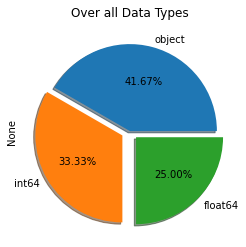

In [6]:
df.isnull().sum()
df.dtypes.value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1],shadow=True)
plt.title('Over all Data Types')
plt.show()

In [7]:
df.shape

(5110, 12)

In [8]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### Missing Values

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

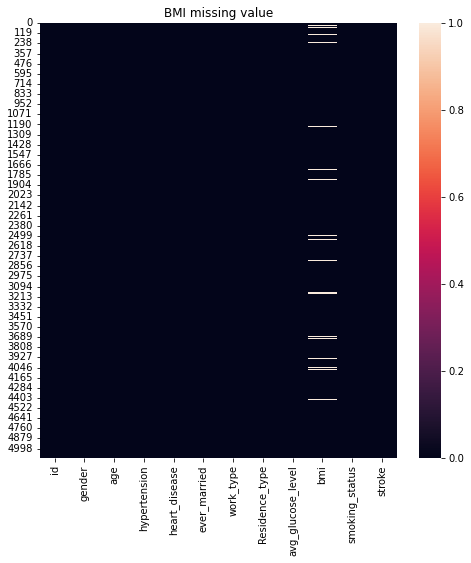

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())
plt.title('BMI missing value')
plt.show()

### Segregate the data on the basis of categorical and numerical columns.

In [11]:
Cateogorical_data = df.iloc[:,[1,5,6,7,10]]
Cateogorical_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [12]:
Numbrical_data = df.iloc[:,[0,2,3,4,8,9,11]]
Numbrical_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Preprocessing

In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
# fill The Missing data 

In [16]:
df.bmi=df.bmi.fillna(df.bmi.mean())

In [17]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [18]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
df['gender'].replace({'Other': 'Female'}, inplace=True)
df.drop('id', axis=1, inplace=True)

In [21]:
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

### Data Visualization

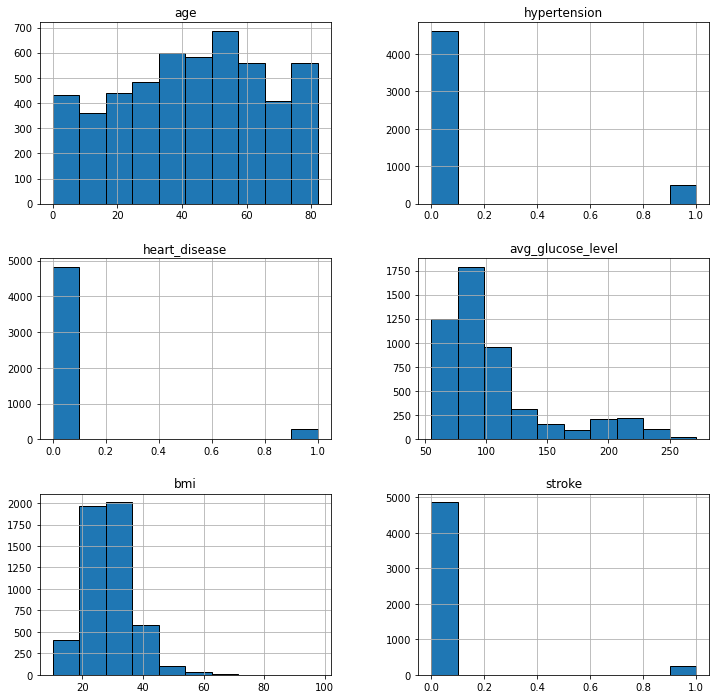

In [25]:
df.hist(edgecolor='black',figsize=(12,12));

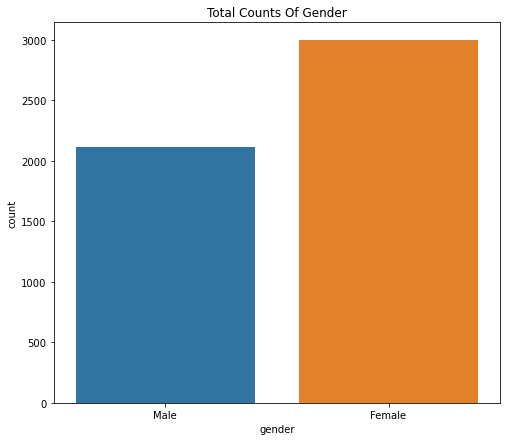

In [26]:
plt.figure(figsize=(8,7))
sns.countplot(data=df,x='gender')
plt.title('Total Counts Of Gender')
plt.show()

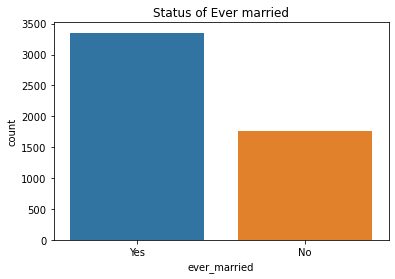

In [27]:
sns.countplot(data=df,x='ever_married')
plt.title('Status of Ever married')
plt.show()

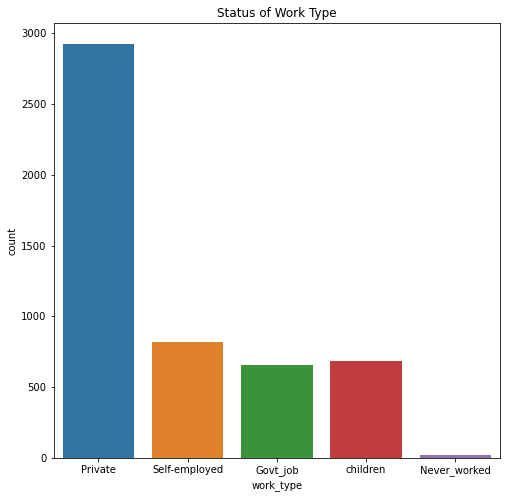

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='work_type')
plt.title('Status of Work Type')
plt.show()

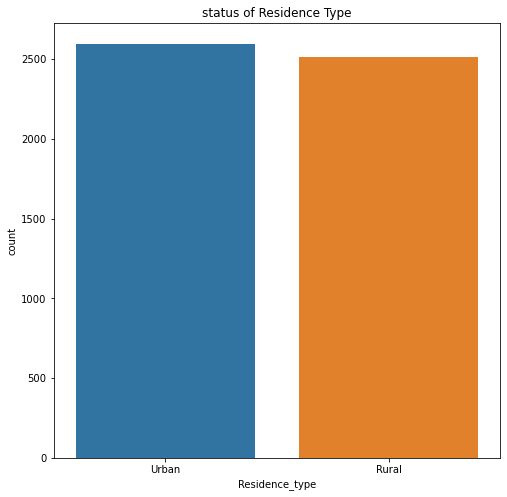

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Residence_type')
plt.title('status of Residence Type');

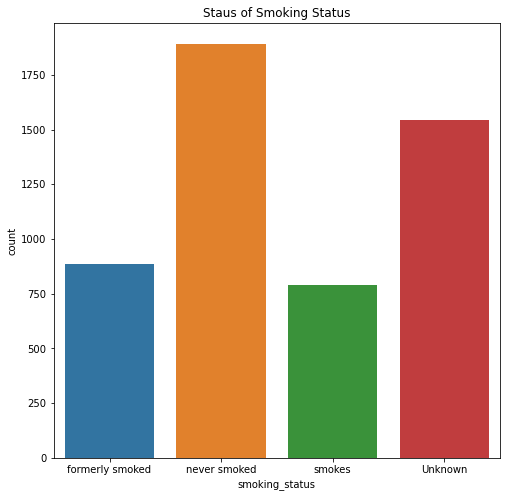

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='smoking_status')
plt.title('Staus of Smoking Status')
plt.show()

In [31]:
df['smoking_status'].value_counts()/len(df)*100

never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64

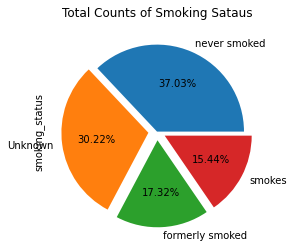

In [32]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1,0.1])
plt.title('Total Counts of Smoking Sataus')
plt.show()

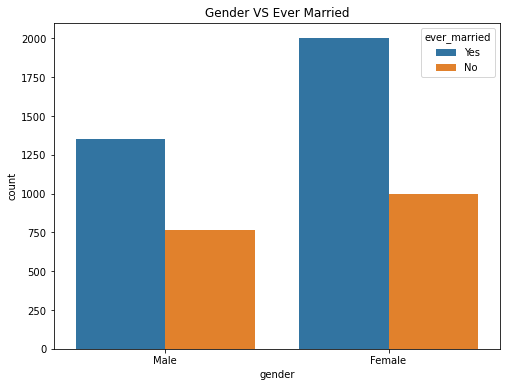

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='gender',hue='ever_married')
plt.title('Gender VS Ever Married')
plt.show()

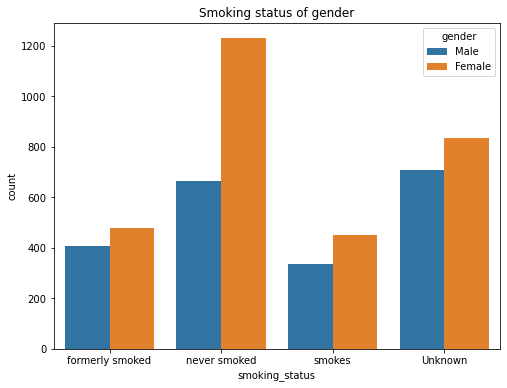

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,hue='gender',x='smoking_status')
plt.title('Smoking status of gender')
plt.show()

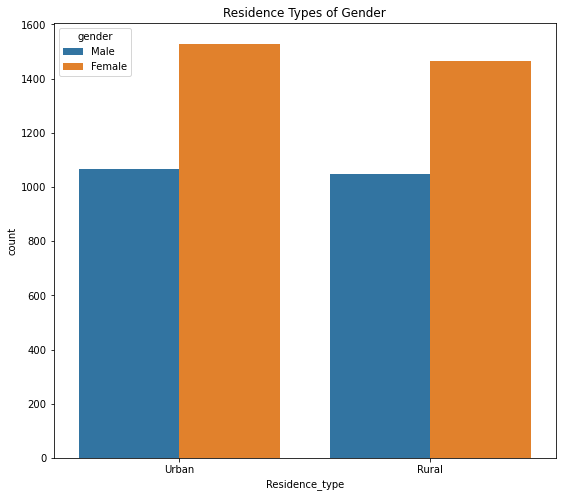

In [35]:
plt.figure(figsize=(9,8))
sns.countplot(data=df,hue='gender',x='Residence_type')
plt.title('Residence Types of Gender')
plt.show()

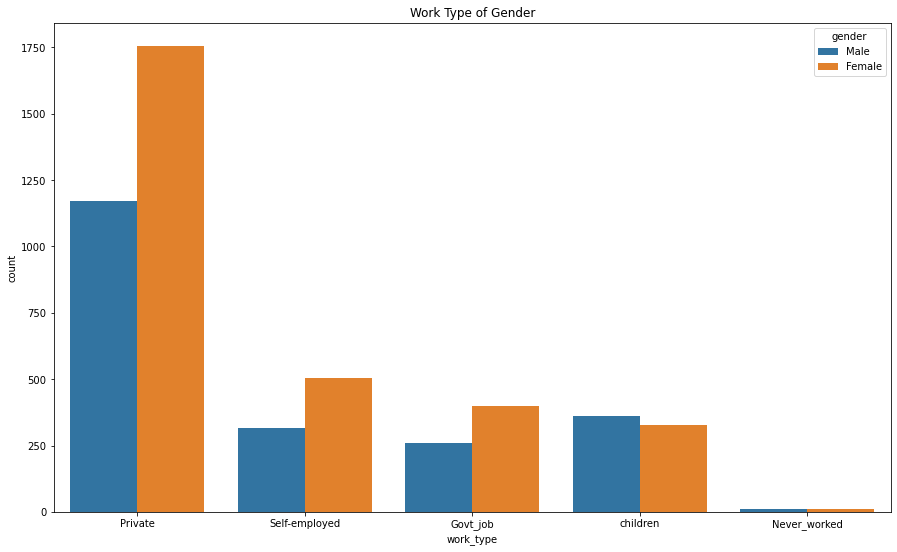

In [36]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,hue='gender',x='work_type')
plt.title('Work Type of Gender')
plt.show()

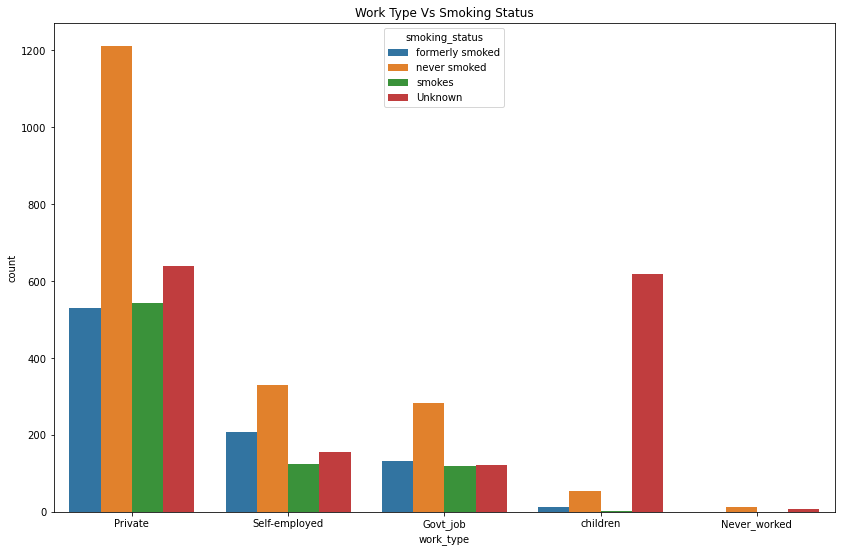

In [37]:
plt.figure(figsize=(14,9))
sns.countplot(data=df,hue='smoking_status',x='work_type')
plt.title('Work Type Vs Smoking Status')
plt.show()

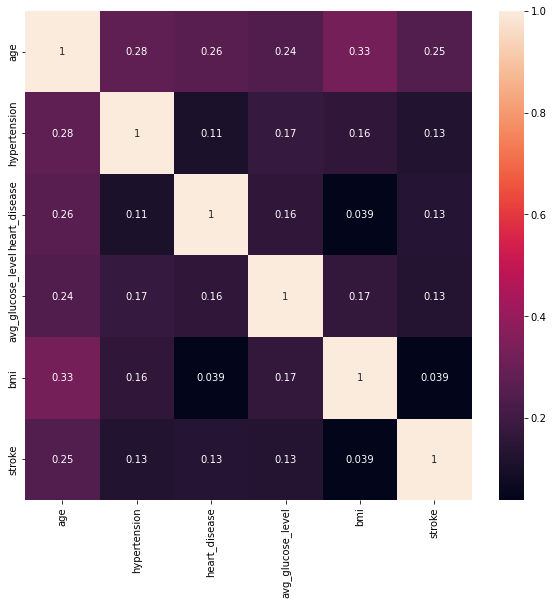

In [38]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Outliers 

In [39]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [40]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [41]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [42]:
num_cols = ['avg_glucose_level','bmi']
for col in num_cols:
    print(col,check_outlier(df,col))

avg_glucose_level True
bmi True


In [43]:
for col in num_cols:
    replace_with_thresholds(df,col)

for col in num_cols:
    print(col,check_outlier(df,col))

avg_glucose_level False
bmi False


### Label Encoding ( Categorical To Numberical )

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
LE = LabelEncoder()

In [64]:
df['gender']=LE.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
0,1,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,1,1,205.957500,4.627254,2.527724,0.546269,3.073993,3.073993,0.546269,2
1,0,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,-1,1,198.250737,5.861493,2.776352,0.473660,3.250012,3.250012,0.473660,-1
2,1,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,-1,1,138.420000,3.259077,1.324000,0.406250,1.730250,1.730250,0.406250,0
3,0,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,2,1,203.757500,4.923183,3.456276,0.702041,4.158316,4.158316,0.702041,2
4,0,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,-1,1,193.357500,7.056563,2.143766,0.303797,2.447563,2.447563,0.303797,0


In [65]:
df['ever_married']=LE.fit_transform(df['ever_married'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
0,1,67.0,0,1,1,Private,Urban,169.3575,36.600000,1,1,205.957500,4.627254,2.527724,0.546269,3.073993,3.073993,0.546269,2
1,0,61.0,0,0,1,Self-employed,Rural,169.3575,28.893237,-1,1,198.250737,5.861493,2.776352,0.473660,3.250012,3.250012,0.473660,-1
2,1,80.0,0,1,1,Private,Rural,105.9200,32.500000,-1,1,138.420000,3.259077,1.324000,0.406250,1.730250,1.730250,0.406250,0
3,0,49.0,0,0,1,Private,Urban,169.3575,34.400000,2,1,203.757500,4.923183,3.456276,0.702041,4.158316,4.158316,0.702041,2
4,0,79.0,1,0,1,Self-employed,Rural,169.3575,24.000000,-1,1,193.357500,7.056563,2.143766,0.303797,2.447563,2.447563,0.303797,0


In [66]:
df['work_type']=LE.fit_transform(df['work_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
0,1,67.0,0,1,1,1,Urban,169.3575,36.600000,1,1,205.957500,4.627254,2.527724,0.546269,3.073993,3.073993,0.546269,2
1,0,61.0,0,0,1,2,Rural,169.3575,28.893237,-1,1,198.250737,5.861493,2.776352,0.473660,3.250012,3.250012,0.473660,-1
2,1,80.0,0,1,1,1,Rural,105.9200,32.500000,-1,1,138.420000,3.259077,1.324000,0.406250,1.730250,1.730250,0.406250,0
3,0,49.0,0,0,1,1,Urban,169.3575,34.400000,2,1,203.757500,4.923183,3.456276,0.702041,4.158316,4.158316,0.702041,2
4,0,79.0,1,0,1,2,Rural,169.3575,24.000000,-1,1,193.357500,7.056563,2.143766,0.303797,2.447563,2.447563,0.303797,0


In [67]:
df['Residence_type']=LE.fit_transform(df['Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
0,1,67.0,0,1,1,1,1,169.3575,36.600000,1,1,205.957500,4.627254,2.527724,0.546269,3.073993,3.073993,0.546269,2
1,0,61.0,0,0,1,2,0,169.3575,28.893237,-1,1,198.250737,5.861493,2.776352,0.473660,3.250012,3.250012,0.473660,-1
2,1,80.0,0,1,1,1,0,105.9200,32.500000,-1,1,138.420000,3.259077,1.324000,0.406250,1.730250,1.730250,0.406250,0
3,0,49.0,0,0,1,1,1,169.3575,34.400000,2,1,203.757500,4.923183,3.456276,0.702041,4.158316,4.158316,0.702041,2
4,0,79.0,1,0,1,2,0,169.3575,24.000000,-1,1,193.357500,7.056563,2.143766,0.303797,2.447563,2.447563,0.303797,0


In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
RS = RobustScaler()
df[num_cols] = RS.fit_transform(df[num_cols])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
0,1,0.611111,0.0,1.0,1,1,1,2.10266,0.911111,0.5,1.0,2.208274,0.644063,0.080328,-0.222034,0.019781,0.019781,-0.222034,1.0
1,0,0.444444,0.0,0.0,1,2,0,2.10266,0.054804,-0.5,1.0,2.008072,1.310014,0.190264,-0.332560,0.081773,0.081773,-0.332560,-0.5
2,1,0.972222,0.0,1.0,1,1,0,0.38092,0.455556,-0.5,1.0,0.453825,-0.094156,-0.451917,-0.435172,-0.453471,-0.453471,-0.435172,0.0
3,0,0.111111,0.0,0.0,1,1,1,2.10266,0.666667,1.0,1.0,2.151124,0.803736,0.490902,0.015085,0.401668,0.401668,0.015085,1.0
4,0,0.944444,1.0,0.0,1,2,0,2.10266,-0.488889,-0.5,1.0,1.880959,1.954831,-0.089445,-0.591127,-0.200841,-0.200841,-0.591127,0.0


In [70]:
df.dtypes

gender                    int32
age                     float64
hypertension            float64
heart_disease           float64
ever_married              int32
work_type                 int32
Residence_type            int32
avg_glucose_level       float64
bmi                     float64
smoking_status          float64
stroke                  float64
avg_glucose_plus_bmi    float64
avg_glucose_bmi         float64
glucose_perc_age        float64
bmi_perc_age            float64
danger_perc_age         float64
gen_danger_perc_age     float64
gen_bmi_perc_age        float64
danger_rate             float64
dtype: object

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
y = df['stroke']
X = df.drop('stroke', axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [74]:
print(X.shape)
print(y.shape)

(5110, 18)
(5110,)


In [75]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 3577
Length of Testing Data: 1533


In [76]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
1921,1,-0.027778,0.0,0.0,1,1,0,0.097028,0.333333,1.0,0.153526,-0.212294,-0.078046,0.032736,-0.047421,-0.047421,0.032736,1.0
4074,0,0.694444,0.0,0.0,1,0,0,1.803365,0.566667,-0.5,1.841278,0.697488,-0.037229,-0.325084,-0.097697,-0.097697,-0.325084,-0.5
2311,0,-1.217778,0.0,0.0,0,3,1,-0.729407,-1.266667,0.0,-1.011560,0.210720,23.743013,21.254750,23.836341,23.836341,21.254750,0.0
3080,0,0.805556,0.0,0.0,1,1,0,-0.225404,-1.133333,-0.5,-0.497987,0.625207,-0.537937,-0.679190,-0.578444,-0.578444,-0.679190,-0.5
1620,0,0.583333,0.0,0.0,1,0,0,-0.172751,0.177778,-0.5,-0.141057,-0.314520,-0.464405,-0.361656,-0.446409,-0.446409,-0.361656,-0.5


In [77]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_plus_bmi,avg_glucose_bmi,glucose_perc_age,bmi_perc_age,danger_perc_age,gen_danger_perc_age,gen_bmi_perc_age,danger_rate
42,1,1.027778,0.0,1.0,1,1,1,1.438866,-0.222222,1.0,1.307962,1.108834,-0.256005,-0.563493,-0.327115,-0.327115,-0.563493,1.5
380,1,-1.138889,0.0,0.0,0,3,0,0.389062,-1.300000,0.0,0.051175,1.579250,10.704374,5.301675,9.759936,9.759936,5.301675,0.0
3524,1,0.361111,0.0,0.0,1,1,1,-0.323925,-0.277778,-0.5,-0.392259,-0.187072,-0.427842,-0.373825,-0.420101,-0.420101,-0.373825,-0.5
352,0,-0.694444,0.0,0.0,0,1,0,0.127154,0.633333,-0.5,0.252500,-0.324611,1.097654,1.541804,1.238183,1.238183,1.541804,-0.5
4927,0,-0.972222,0.0,0.0,0,3,0,-0.598317,-1.633333,0.0,-0.971815,0.897959,2.050743,1.031862,1.879344,1.879344,1.031862,0.0


In [78]:
y_train.head()

1921    0.0
4074    0.0
2311    0.0
3080    0.0
1620    0.0
Name: stroke, dtype: float64

In [79]:
y_test.head()

42      1.0
380     0.0
3524    0.0
352     0.0
4927    0.0
Name: stroke, dtype: float64

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
LR= LogisticRegression()

In [82]:
LR.fit(X_train, y_train)

LogisticRegression()

In [83]:
ypred = LR.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
CM = confusion_matrix(y_test, ypred)

In [86]:
CM

array([[1456,    1],
       [  76,    0]], dtype=int64)

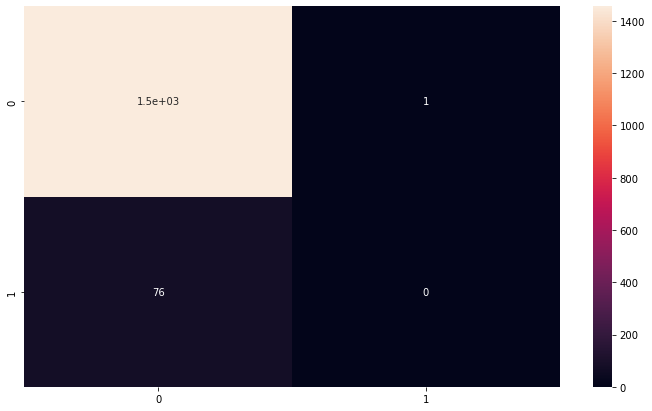

In [87]:
plt.figure(figsize=(12,7))
sns.heatmap(CM, annot=True)
plt.show()

In [88]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1457
         1.0       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



### AUC AND RUC

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [90]:
score = roc_auc_score(y_test, ypred)

In [91]:
score

0.49965682910089226

In [92]:
FPR,TPR,thresholds = roc_curve(y_test, ypred)

In [93]:
thresholds

array([2., 1., 0.])

In [94]:
FPR

array([0.00000000e+00, 6.86341798e-04, 1.00000000e+00])

In [95]:
TPR

array([0., 0., 1.])

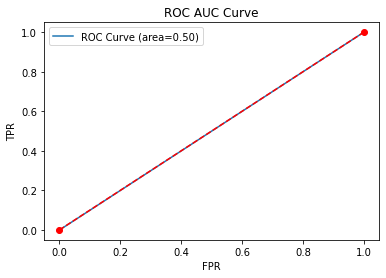

In [100]:
plt.plot(FPR, TPR, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'ro--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [102]:
classifier = DecisionTreeClassifier(max_depth=3)

In [103]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, y_pred)

0.949119373776908

In [107]:
from sklearn.metrics import classification_report

In [108]:
print('classification_report:-\n', classification_report(y_test, y_pred))

classification_report:-
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1457
         1.0       0.25      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
classifier= RandomForestClassifier(n_estimators=11)

In [111]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

### Randomized searchCV

In [112]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [113]:
data = {"max_depth": [3, None],
            "max_features": randint(1, 9),
            "min_samples_leaf": randint(1, 9),
            "criterion": ["gini", "entropy"]}

In [114]:
Classifier = RandomForestClassifier()

In [115]:
Classifier

RandomForestClassifier()

In [116]:
Classifier_cv = RandomizedSearchCV(Classifier, data, cv = 4)
Classifier_cv.fit(X, y)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252E4FD6A60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252E4FE51F0>})

In [117]:
Classifier_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 8}

In [118]:
print("Best score is :",(Classifier_cv.best_score_))

Best score is : 0.9512720847840019


#                    THE END